<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices 

1. **Modelo de población de una especie de pajaros** 
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1) 
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros 
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que: 

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix} 
0 & 2 \\
0.3 & 0.5 
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:


\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n a_2 \vec{v}_2 \right]
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A



In [3]:
#@title Librerías
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pylab as plt


**Método 1**

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


In [4]:
#10 hembras  y 10 machos  adultos 
A=np.asmatrix([[0,2],[0.3,0.5]])
p_o=np.asmatrix([10,10]).T

In [5]:
def p_n(n,A):
  pn=matrix_power(A,n)@p_o
  #se debe tener en cuenta q se redonde al menor entero
  conv=pn[0]/pn[1]
  pn=np.floor(pn)
  return f"La población está dada por {pn} y converge a {conv}"
#Encontrando la población para n=100  años 
p_n(100,A)

'La población está dada por [[7745.]\n [4120.]] y converge a [[1.87980343]]'

In [6]:
#@title Condiciones iniciales
Av=np.linalg.eig(A) # Autovalores y autovectores 
vec_1=np.squeeze(np.asarray(Av[1].T[0].T))
vec_2= np.squeeze(np.asarray(Av[1].T[1].T))

#resultado con np.linalg.solve.
a=np.array([[vec_1[0],vec_2[0]],[vec_1[1],vec_2[1]]])
b = np.array([[p_o[0, 0]], [p_o[1, 0]]])
x=np.linalg.solve(a,b)
a1=x[0][0]    #array
a2=x[1][0]   #array

#Encontrando p0
po=a1*vec_1+a2*vec_2
#Definiendo los autovalores
λ_1=Av[0][0]
λ_2=Av[0][1]

***Método 2***
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n a_2 \vec{v}_2 \right]
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:
donde $p_n=a_1\lambda_1^n\vec{v}_1$

In [7]:
def func_pn(n,a1,a2,vec_1,vec_2,λ_1,λ_2):
    t1=a1*vec_1
    t2=(λ_2/λ_1)**n*a2*vec_2
    pn=λ_1**n *(t1+t2)
    pn=np.floor(pn)
    conv=pn[0]/pn[1]
    return f"La población está dada por {pn} y converge a {conv}"

#aplicando a n=100
pn = func_pn(100,a1,a2,vec_1,vec_2,λ_1,λ_2);pn

'La población está dada por [7745. 4120.] y converge a 1.8798543689320388'



2. **Modelo de encriptación** 

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?


In [8]:
#La matriz de código es 
A=np.asmatrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

#se necesita la matriz inversa de A
A_inv=np.linalg.inv(A)

#Números encriptados
N=np.asmatrix([[  47,   49,  -19,  257,  487],
 [  10,   -9,   63,  137,  236],
 [  79,  142, -184,  372,  536],
 [  59,   70,  -40,  332,  588]])

#tenemos que multplicar la anterior martriz por la inversa de A
mensaje_d = np.round(N@A_inv).astype(int)

In [9]:
# Convertir la matriz decodificada en una cadena de caracteres
alfabeto = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ '
mensaje = ''

# Imprimir el mensaje decodificado

for fila in range(mensaje_d.shape[0]):
    for columna in range(mensaje_d.shape[1]):
        numero = mensaje_d[fila, columna]
        mensaje += alfabeto[numero-1]
print("El mensaje decodificado es =",mensaje)

El mensaje decodificado es = ARE YOU HAVING FUN  





3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 




**Recordemos**
Para diagonalizar una matriz $A$, se necesita encontrar una matriz invertible $U$ tal que $U^{-1}AU$ sea una matriz diagonal $D$. Esto significa que las columnas de $U$ son los autovectores de $A$ y los elementos de la diagonal de $D$ son los autovalores correspondientes de $A$.



In [19]:
#Se define la matriz de coeficientes 
A = np.asmatrix([[2, -1, 1], [0, 3, -1], [2, 1, 3]])
#Diagonalizando, primero se encuentran las autovectores
aV=np.linalg.eig(A)
#Matriz de los autovectores
U=aV[1]
#Matriz diagonal de los autovalores
D=U.I@A@U
#Comprobando 
a=U@D@U.I

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
 $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 



In [20]:
#@title Condiciones iniciales
time=np.linspace(0,2,1000)
#Array de condiciones inciales x0,y0 y z0 respectivamente
r0 = np.array([1, 1, 2])

In [31]:
#Definamos una función para hallar la solución en el intervalo de tiempo de [0,2]
def sln(D, time, U, r0):
    sol = np.zeros((len(time), 3))
    for i, t in enumerate(time):
        r = U @ np.exp(D * t) @ np.linalg.inv(U) @ r0
        sol[i] = [r[0,0], r[0,1], r[0,2]]
    return sol
# ======================
#Aplicando 
sln_1=sln(D, time, U, r0)
x=sln_1[0:,0]
y=sln_1[0:,1]
z=sln_1[0:,2]

<ipython-input-31-e634d71c1e66>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  sol[i] = [r[0,0], r[0,1], r[0,2]]


c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 


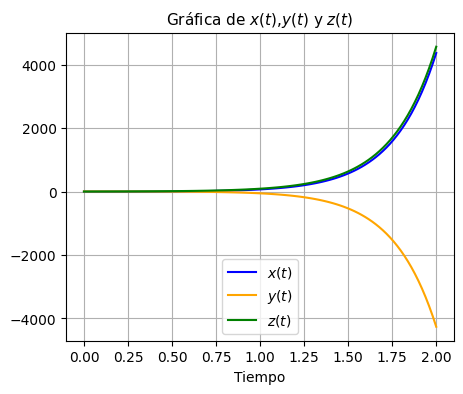

In [32]:
#Array de condiciones inciales x0,y0 y z0 respectivamente
r0 = np.array([1, 1, 2])
plt.figure(figsize=(5,4))
plt.plot(time,x,color='blue',label='$x(t)$')
plt.plot(time,y,color='orange',label='$y(t)$')
plt.plot(time,z,color='green',label='$z(t)$')
plt.xlabel('Tiempo')
plt.title('Gráfica de $x(t)$,$y(t)$ y $z(t)$',size=11)
plt.legend(loc='lower center')
plt.grid()
plt.show()

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$


In [33]:
# Calculando  la solución analítica
def sln_analytica(time,y0):
    x0 = r0[0]
    y0 = r0[1]
    z0 = r0[2]
    sol = np.zeros((len(time), 3))
    for i,t in enumerate(time):
        x = x0*np.exp(2*t)*(1+np.exp(2*t)-2*t) - y0*2*t*np.exp(2*t) + z0*np.exp(2*t)*(-1+np.exp(2*t))
        y = x0*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t)) + y0*2*(t+1)*np.exp(2*t) + z0*(-np.exp(2*t)*(-1+np.exp(2*t)))
        z = x0*np.exp(2*t)*(-1+np.exp(2*t)+2*t) + y0*2*t*np.exp(2*t) + z0*np.exp(2*t)*(1+np.exp(2*t))
        sol[i] = [x/2, y/2, z/2]
    return sol

# ======================
sln_2=sln_analytica(time,r0)
x_=sln_2[0:,0]
y_=sln_2[0:,1]
z_=x=sln_2[0:,2]

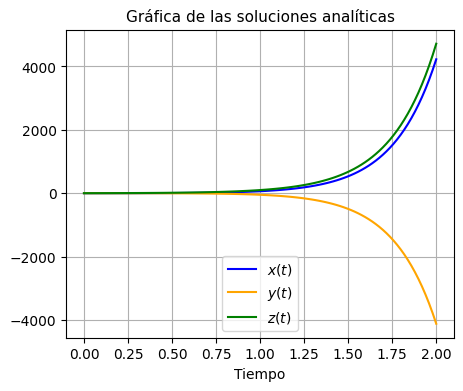

In [34]:
#Gráfica de la solución analítica
plt.figure(figsize=(5,4))
plt.plot(time,x_,color='blue',label='$x(t)$')
plt.plot(time,y_,color='orange',label='$y(t)$')
plt.plot(time,z_,color='green',label='$z(t)$')
plt.xlabel('Tiempo')
plt.title('Gráfica de las soluciones analíticas',size=11)
plt.legend(loc='lower center')
plt.grid()
plt.show()